In [2]:
import datetime

class Timer:
    """A simple timer class"""

    def __init__(self):
        pass

    def start(self):
        """Starts the timer"""
        self.start = datetime.datetime.now()
        return self.start

    def stop(self, message="Total: "):
        """Stops the timer.  Returns the time elapsed"""
        self.stop = datetime.datetime.now()
        return message + str(self.stop - self.start)

    def now(self, message="Now: "):
        """Returns the current time with a message"""
        return message + ": " + str(datetime.datetime.now())

    def elapsed(self, message="Elapsed: "):
        """Time elapsed since start was called"""
        return message + str(datetime.datetime.now() - self.start)

    def split(self, message="Split started at: "):
        """Start a split timer"""
        self.split_start = datetime.datetime.now()
        return message + str(self.split_start)

    def unsplit(self, message="Unsplit: "):
        """Stops a split. Returns the time elapsed since split was called"""
        return message + str(datetime.datetime.now() - self.split_start)

In [3]:
import pandas as pd

dbsuper_metadata = "/Users/manuel/development/thesis/download/dbSUPER/super-enhancers-annotations.csv"
dbsuper_df = pd.DataFrame.from_csv(path=dbsuper_metadata, index_col='index', sep='\t')

In [4]:
dbsuper_df.T

index                     0               1               2      \
ID                     SE_00001        SE_00002        SE_00003   
Chrom                      chr1           chr13            chr1   
Start                 120485363       110838836       145206326   
End                   120615071       111112228       145293008   
Size                     129708          273392           86682   
Associated Gene          NOTCH2          COL4A2        NOTCH2NL   
Method                  H3K27ac         H3K27ac         H3K27ac   
Rank                          1               2               3   
Cell/Tissue      Adipose Nuclei  Adipose Nuclei  Adipose Nuclei   
Genome                    Human           Human           Human   

index                     3               4               5      \
ID                     SE_00004        SE_00005        SE_00006   
Chrom                      chr5            chr2            chr2   
Start                 158117077       218548183        54586565   
End                   158371526       218895526        54904699   
Size                     254449          347343          318134   
Associated Gene            EBF1            TNS1          SPTBN1   
Method                  H3K27ac         H3K27ac         H3K27ac   
Rank                          4               5               6   
Cell/Tissue      Adipose Nuclei  Adipose Nuclei  Adipose Nuclei   
Genome                    Human           Human           Human   

index                     6               7               8      \
ID                     SE_00007        SE_00008        SE_00009   
Chrom                      chr6            chr3            chr1   
Start                 112420456        12327760        12455848   
End                   112652968        12522419        12698932   
Size                     232512          194659          243084   
Associated Gene           LAMA4           PPARG           DHRS3   
Method                  H3K27ac         H3K27ac         H3K27ac   
Rank                          7               8               9   
Cell/Tissue      Adipose Nuclei  Adipose Nuclei  Adipose Nuclei   
Genome                    Human           Human           Human   

index                     9        ...        69195     69196      69197  \
ID                     SE_00010    ...     SE_69197  SE_69198   SE_69199   
Chrom                      chr8    ...        chr11     chr17      chr20   
Start                  30239218    ...      3158961  65746656   62579170   
End                    30455499    ...      3182564  65753367   62591650   
Size                     216281    ...        23603      6711      12480   
Associated Gene           RBPMS    ...       OSBPL5  SNORA38B  UCKL1-AS1   
Method                  H3K27ac    ...      H3K27ac   H3K27ac    H3K27ac   
Rank                         10    ...          526       527        528   
Cell/Tissue      Adipose Nuclei    ...           H9        H9         H9   
Genome                    Human    ...        Human     Human      Human   

index               69198     69199      69200     69201      69202     69203  \
ID               SE_69200  SE_69201   SE_69202  SE_69203   SE_69204  SE_69205   
Chrom                chrX      chrX       chr4     chr17      chr12     chr19   
Start            39949099  41331328  113625864  42616770  117472669  47728521   
End              39969242  41336670  113632734  42637296  117501818  47732531   
Size                20143      5342       6870     20526      29149      4010   
Associated Gene      BCOR       NYX    MIR302B      FZD2       TESC   MIR3191   
Method            H3K27ac   H3K27ac    H3K27ac   H3K27ac    H3K27ac   H3K27ac   
Rank                  529       530        531       532        533       534   
Cell/Tissue            H9        H9         H9        H9         H9        H9   
Genome              Human     Human      Human     Human      Human     Human   

index               69204  
ID               SE_69206  
C

In [5]:
len(dbsuper_df['Cell/Tissue'].unique())

102

In [6]:
len(dbsuper_df['Associated Gene'].unique())

10474

In [7]:
dbsuper_df.describe()

Start           End           Size          Rank
count  6.920500e+04  6.920500e+04   69205.000000  69205.000000
mean   7.689912e+07  7.693547e+07   36342.356231    386.854750
std    5.749529e+07  5.749668e+07   29101.081244    271.435751
min    1.204600e+04  3.707400e+04     285.000000      1.000000
25%    3.296294e+07  3.300254e+07   16217.000000    163.000000
50%    6.334058e+07  6.338249e+07   29647.000000    343.000000
75%    1.146508e+08  1.146848e+08   47950.000000    566.000000
max    2.491573e+08  2.491854e+08  492600.000000   1339.000000

In [8]:
dbsuper_df['Method'].unique()

array(['H3K27ac', 'BRD4', 'MED1'], dtype=object)

In [9]:
len(dbsuper_df['Associated Gene'].unique())

10474

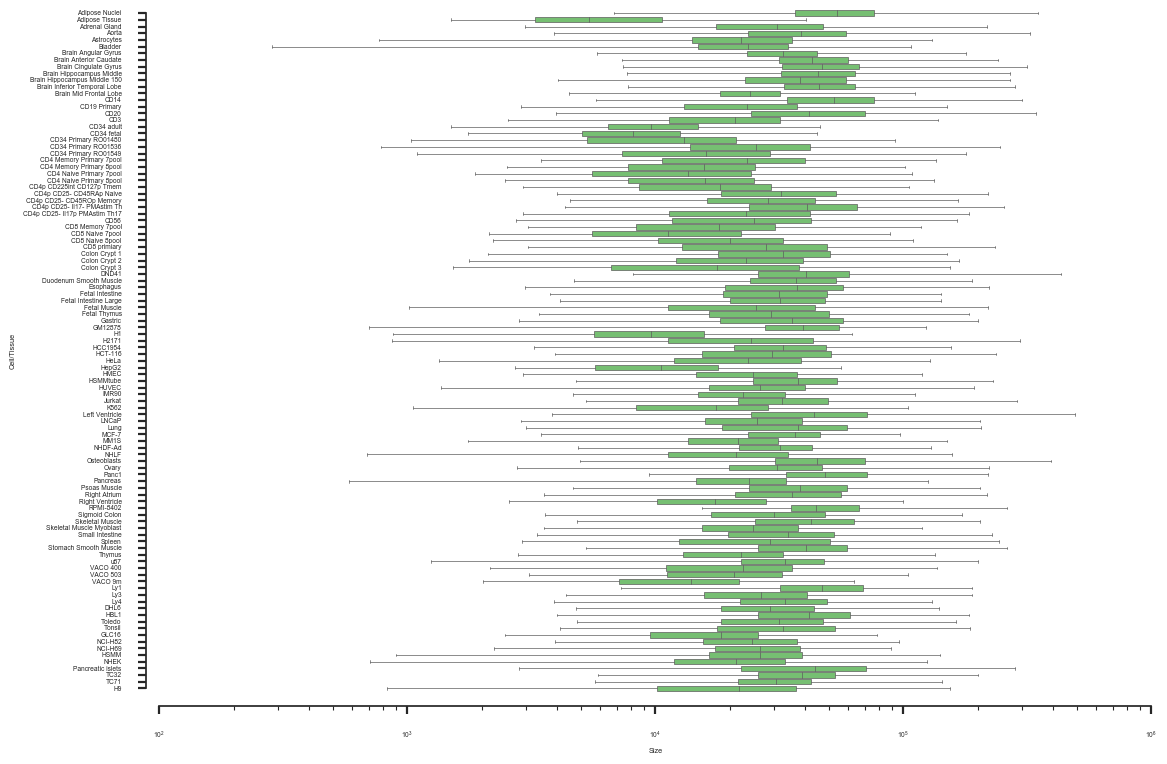

In [10]:
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.3, rc={"lines.linewidth": 0.5})

# Plot the orbital period with horizontal boxes
ax = sns.boxplot(x="Size", y="Cell/Tissue", data=dbsuper_df,
                 whis=np.inf, color="g")

# Add in points to show each observation
#sns.stripplot(x="size", y="chrom", data=df_encode_only,
 #             jitter=True, size=3, color=".3", linewidth=0)


# Make the quantitative axis logarithmic
ax.set_xscale("log")
sns.despine(offset=10,trim=True)

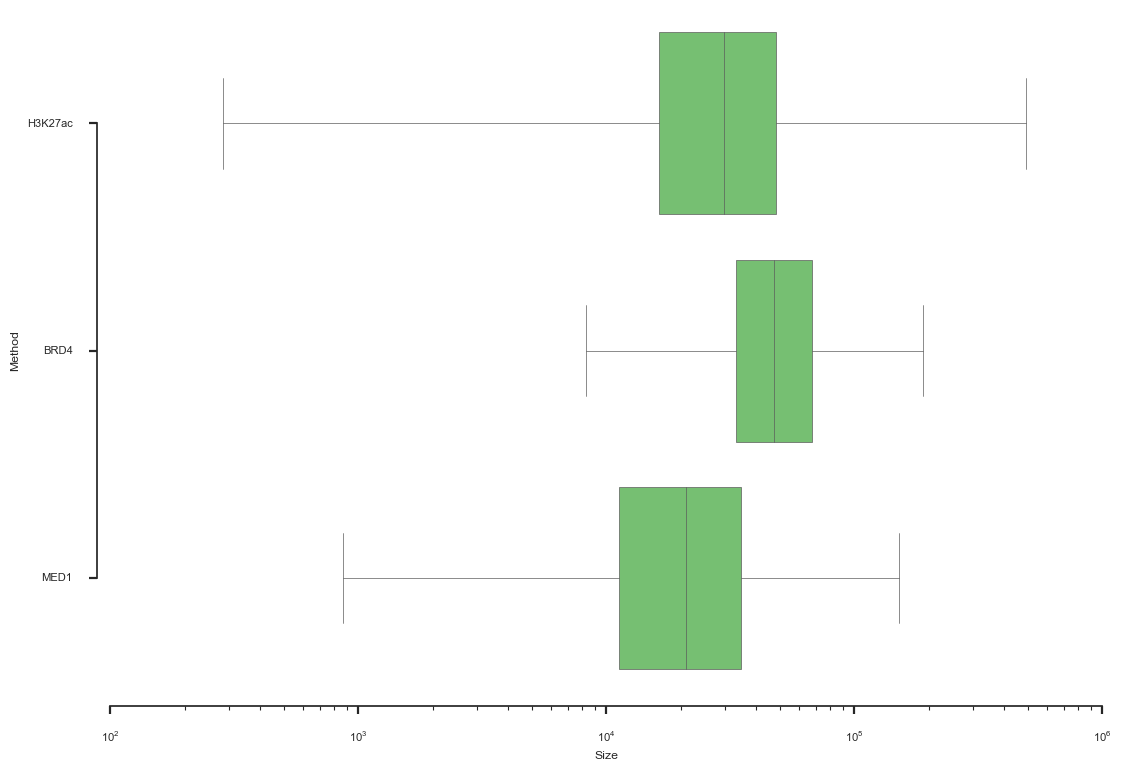

In [11]:
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.5, rc={"lines.linewidth": 0.5})

# Plot the orbital period with horizontal boxes
ax = sns.boxplot(x="Size", y="Method", data=dbsuper_df,
                 whis=np.inf, color="g")

# Add in points to show each observation
#sns.stripplot(x="size", y="chrom", data=df_encode_only,
 #             jitter=True, size=3, color=".3", linewidth=0)


# Make the quantitative axis logarithmic
ax.set_xscale("log")
sns.despine(offset=10,trim=True)

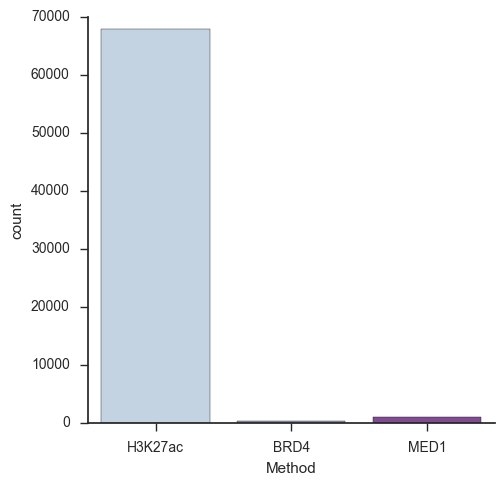

In [12]:
sns.set(style="ticks", palette="muted", color_codes=True)
g = sns.factorplot(x="Method", data=dbsuper_df, kind="count",
                   palette="BuPu", size=5, aspect=1.0)

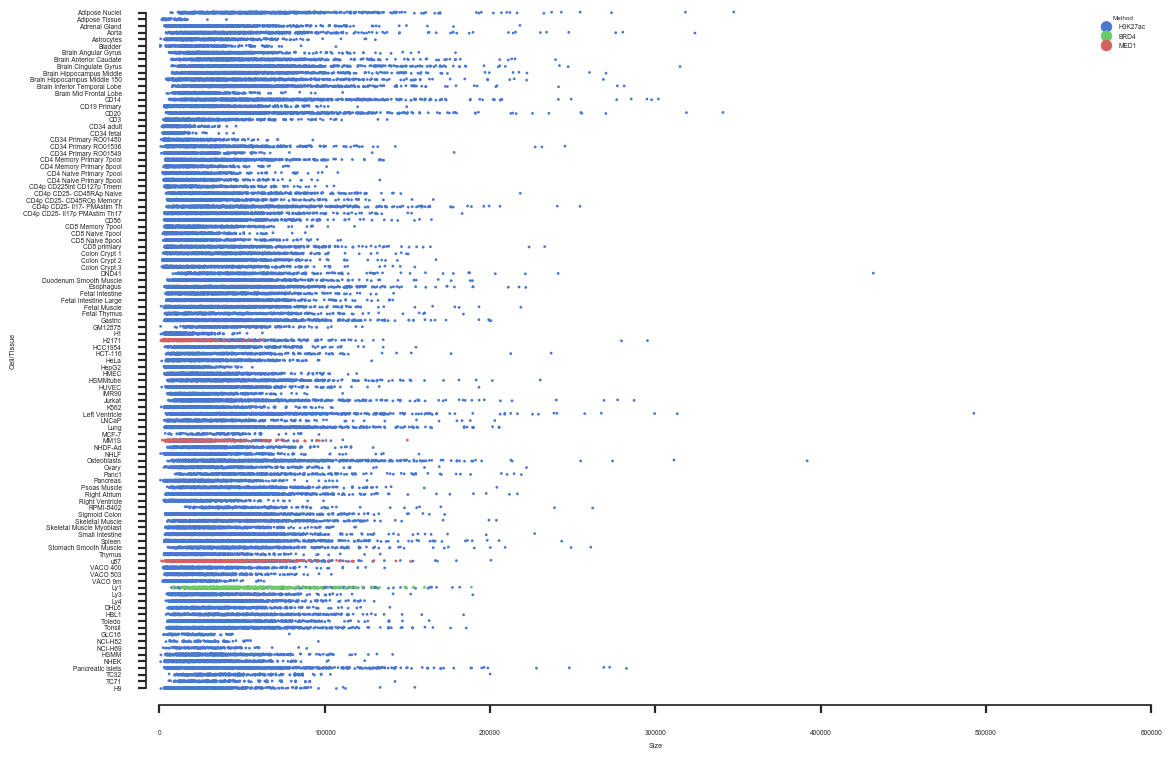

In [13]:
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.3, rc={"lines.linewidth": 0.3})   
g = sns.stripplot(y="Cell/Tissue", x="Size", data=dbsuper_df, hue="Method", jitter=True, size=2);
g.set_xlim(0,)
#g.set_xscale("log")
sns.despine(offset=10,trim=True)

/Users/manuel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(0, 1600.0)

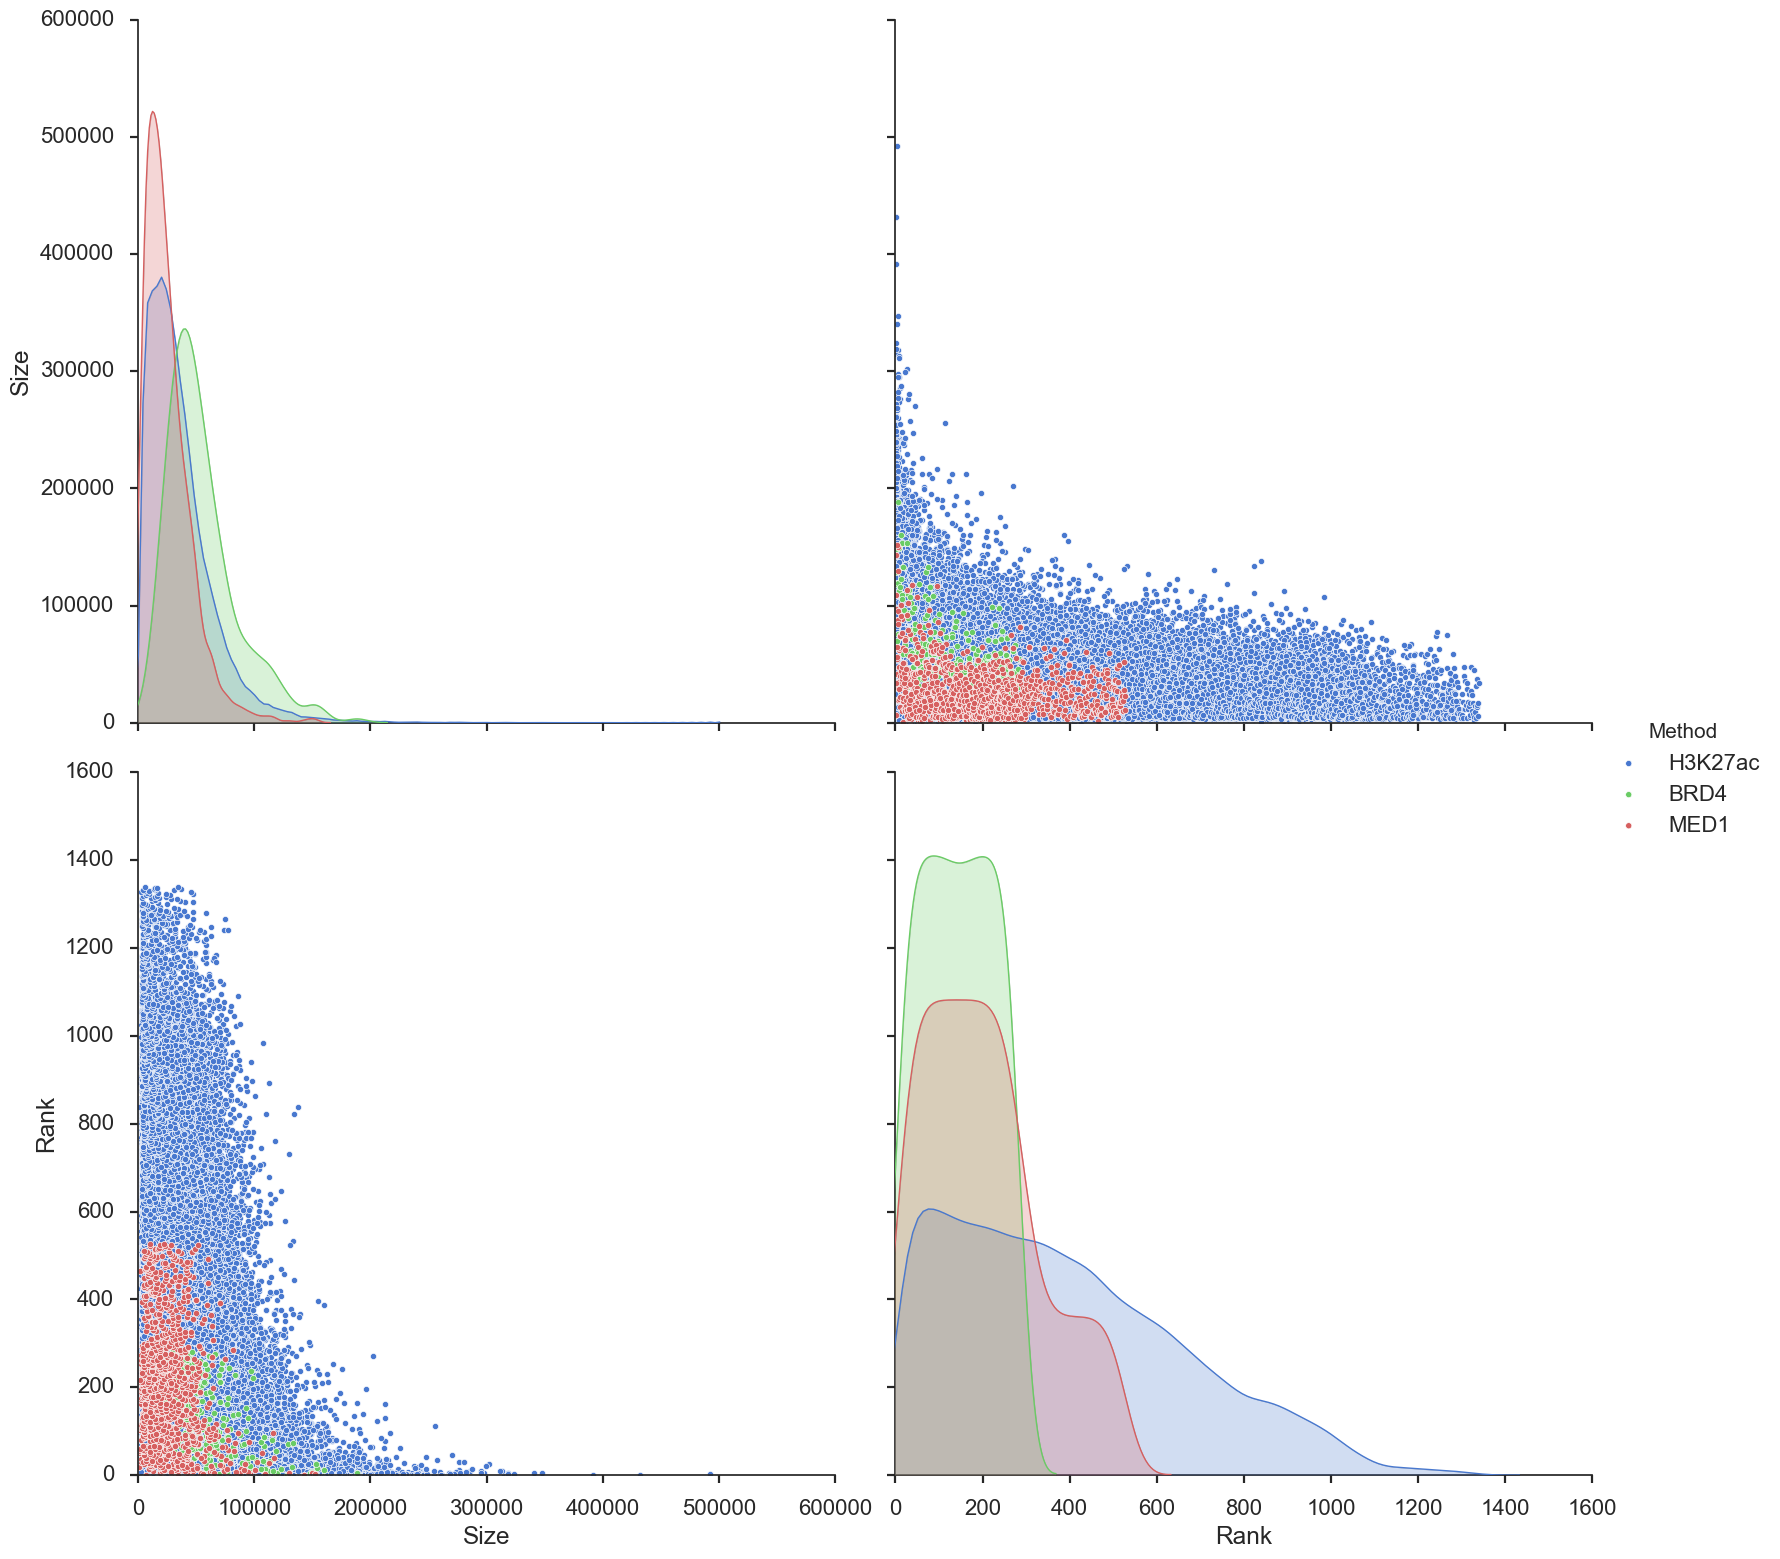

In [14]:
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=1, rc={"lines.linewidth": 1})   
g = sns.pairplot(dbsuper_df[['Size', 'Rank', 'Method', 'Cell/Tissue']], hue="Method", size=8, diag_kind='kde', diag_kws=dict(shade=True))
g.axes[0,0].set_ylim(0,)
g.axes[1,0].set_ylim(0,)
g.axes[0,0].set_xlim(0,)
g.axes[1,0].set_xlim(0,)
g.axes[0,1].set_xlim(0,)
g.axes[1,1].set_xlim(0,)

#sns.despine(offset=0,trim=True)

In [15]:
pivot_count_chrom = pd.pivot_table(dbsuper_df,index=["Cell/Tissue"], values=["ID"], columns=["Chrom"],aggfunc=[len])
pivot_count_method = pd.pivot_table(dbsuper_df,index=["Cell/Tissue"], values=["ID"], columns=["Method"],aggfunc=[len])
pivot_mean_chrom_score = pd.pivot_table(dbsuper_df,index=["Cell/Tissue"], values=["Rank"], columns=["Chrom"],aggfunc=[np.mean])
pivot_mean_method_score = pd.pivot_table(dbsuper_df,index=["Cell/Tissue"], values=["Rank"], columns=["Method"],aggfunc=[np.mean])

In [16]:
pivot_count_chrom = pivot_count_chrom.fillna(0)
pivot_count_method = pivot_count_method.fillna(0)
pivot_mean_chrom_score = pivot_mean_chrom_score.fillna(0)
pivot_mean_method_score = pivot_mean_method_score.fillna(0)

In [17]:
pivot_count_method

len               
                               ID               
Method                       BRD4 H3K27ac   MED1
Cell/Tissue                                     
Adipose Nuclei                0.0   781.0    0.0
Adipose Tissue                0.0    71.0    0.0
Adrenal Gland                 0.0   680.0    0.0
Aorta                         0.0   703.0    0.0
Astrocytes                    0.0   650.0    0.0
Bladder                       0.0   249.0    0.0
Brain Angular Gyrus           0.0   719.0    0.0
Brain Anterior Caudate        0.0   907.0    0.0
Brain Cingulate Gyrus         0.0  1005.0    0.0
Brain Hippocampus Middle      0.0   908.0    0.0
Brain Hippocampus Middle 150  0.0  1039.0    0.0
Brain Inferior Temporal Lobe  0.0  1067.0    0.0
Brain Mid Frontal Lobe        0.0   357.0    0.0
CD14                          0.0  1019.0    0.0
CD19 Primary                  0.0   688.0    0.0
CD20                          0.0   970.0    0.0
CD3                           0.0   664.0    0.0
CD34 Primary RO01480          0.0   456.0    0.0
CD34 Primary RO01536          0.0   733.0    0.0
CD34 Primary RO01549          0.0   326.0    0.0
CD34 adult                    0.0   234.0    0.0
CD34 fetal                    0.0   147.0    0.0
CD4 Memory Primary 7pool      0.0  1015.0    0.0
CD4 Memory Primary 8pool      0.0   410.0    0.0
CD4 Naive Primary 7pool       0.0   479.0    0.0
CD4 Naive Primary 8pool       0.0   571.0    0.0
CD4p CD225int CD127p Tmem     0.0   444.0    0.0
CD4p CD25- CD45RAp Naive      0.0   465.0    0.0
CD4p CD25- CD45ROp Memory     0.0   474.0    0.0
CD4p CD25- Il17- PMAstim Th   0.0   867.0    0.0
...                           ...     ...    ...
MM1S                          0.0   640.0  308.0
NCI-H69                       0.0   129.0    0.0
NCI-H82                       0.0    67.0    0.0
NHDF-Ad                       0.0   612.0    0.0
NHEK                          0.0  1024.0    0.0
NHLF                          0.0   784.0    0.0
Osteoblasts                   0.0  1089.0    0.0
Ovary                         0.0   478.0    0.0
Panc1                         0.0   355.0    0.0
Pancreas                      0.0   591.0    0.0
Pancreatic islets             0.0   708.0    0.0
Psoas Muscle                  0.0   505.0    0.0
RPMI-8402                     0.0   220.0    0.0
Right Atrium                  0.0   889.0    0.0
Right Ventricle               0.0   390.0    0.0
Sigmoid Colon                 0.0  1023.0    0.0
Skeletal Muscle               0.0   618.0    0.0
Skeletal Muscle Myoblast      0.0   645.0    0.0
Small Intestine               0.0   946.0    0.0
Spleen                        0.0  1197.0    0.0
Stomach Smooth Muscle         0.0   611.0    0.0
TC32                          0.0   422.0    0.0
TC71                          0.0   277.0    0.0
Thymus                        0.0   559.0    0.0
Toledo                        0.0   782.0    0.0
Tonsil                        0.0   979.0    0.0
VACO 400                      0.0   635.0    0.0
VACO 503                      0.0   556.0    0.0
VACO 9m                       0.0   371.0    0.0
u87                           0.0  1073.0  527.0

[102 rows x 3 columns]

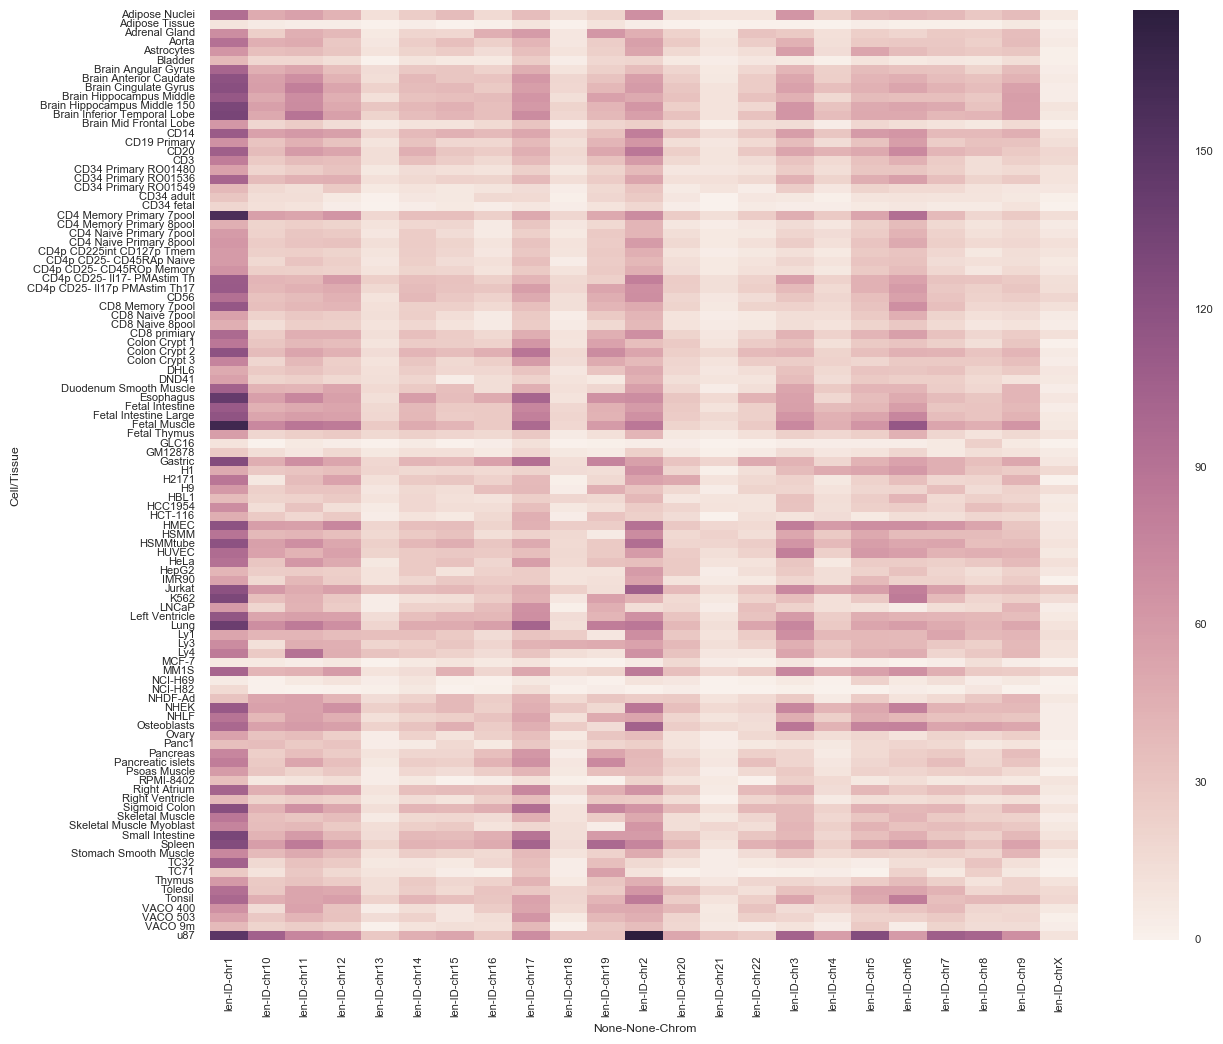

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_context("poster", font_scale=0.5, rc={"lines.linewidth": 0.5})

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(14,12))   
sns.heatmap(pivot_count_chrom, annot=False, linewidths=0, ax=ax)

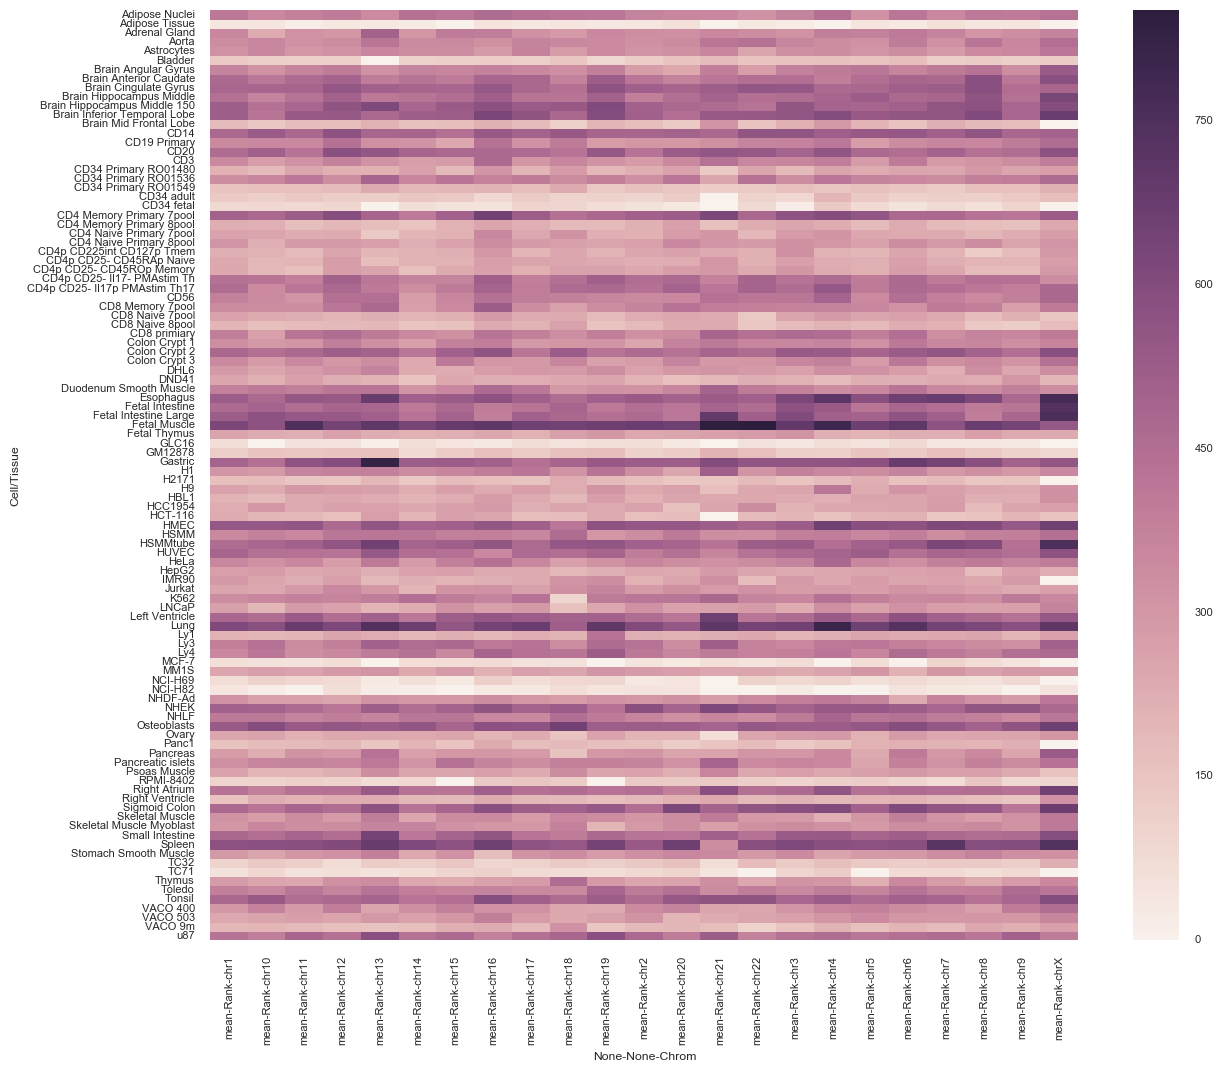

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_context("poster", font_scale=0.5, rc={"lines.linewidth": 0.5})

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(14,12))   
sns.heatmap(pivot_mean_chrom_score, annot=False, linewidths=0, ax=ax)

In [20]:
import numpy as np
import pandas as pd

hdf_table = "/Users/manuel/development/thesis/storage/encode_overlaps.hdf"

timer = Timer()
timer.start()
placenta_df = pd.read_hdf(hdf_table,'encode_dbsuper',where='biosample_term_name == "placenta"')
print("Query on hdf table by biosample_term_name == \"placenta\" in", timer.elapsed())
timer.stop()

Query on hdf table by biosample_term_name == "placenta" in Elapsed: 0:00:03.965055


'Total: 0:00:03.965176'

In [21]:
placenta_df.T

157907  \
index                                                           157907   
chrom                                                            chr11   
start                                                         65253923   
end                                                           65263038   
name                                            ENCODE.3.ENCFF447DLF.0   
score                                                                1   
strand                                                               .   
size                                                              9115   
method                                                   DNase_H3K27ac   
description          Enhancer-like regions using DNase and H3K27ac ...   
assembly                                                          hg19   
biosample_type                                                  tissue   
biosample_term_id                                       UBERON:0001987   
biosample_term_name                                           placenta   
developmental_slims                                       ['mesoderm']   
system_slims                                   ['reproductive system']   
organ_slims                   ['extraembryonic structure', 'placenta']   
encyclopedia                                                    ENCODE   
SE_chrom                                                         chr11   
SE_start                                                      65244384   
SE_end                                                        65257210   
SE_name                                                       SE_33163   
SE_score                                                           452   
SE_size                                                          12826   
SE_associated_gene                                              MALAT1   
SE_method                                                      H3K27ac   
SE_biosample                                                        H1   
SE_ovlp_len                                                       3287   
SE_ovlp_pct                                                    36.0614   
SE_encyclopedia                                                dbSUPER   

                                                                157908  \
index                                                           157908   
chrom                                                            chr11   
start                                                         65253923   
end                                                           65263038   
name                                            ENCODE.3.ENCFF447DLF.0   
score                                                                1   
strand                                                               .   
size                                                              9115   
method                                                   DNase_H3K27ac   
description          Enhancer-like regions using DNase and H3K27ac ...   
assembly                                                          hg19   
biosample_type                                                  tissue   
biosample_term_id                                       UBERON:0001987   
biosample_term_name                                           placenta   
developmental_slims                                       ['mesoderm']   
system_slims                                   ['reproductive system']   
organ_slims                   ['extraembryonic structure', 'placenta']   
encyclopedia                                                    ENCODE   
SE_chrom                                                         chr11   
SE_start                                                      65260150   
SE_end                                                        65268148   
SE_name                                                       SE_12527   
SE_score                                                           

In [22]:
len(placenta_df['SE_associated_gene'].unique())

7730

In [23]:
len(placenta_df['SE_biosample'].unique())

100

In [24]:
placenta_df.describe()

index         start           end     score           size  \
count  170405.000000  1.704050e+05  1.704050e+05  170405.0  170405.000000   
mean   243109.000000  7.392388e+07  7.392656e+07       1.0    2681.100285   
std     49191.830648  5.494697e+07  5.494715e+07       0.0    2795.144008   
min    157907.000000  1.030000e+04  1.045000e+04       1.0     150.000000   
25%    200508.000000  3.314144e+07  3.314375e+07       1.0     993.000000   
50%    243109.000000  6.201217e+07  6.201689e+07       1.0    1918.000000   
75%    285710.000000  1.092188e+08  1.092235e+08       1.0    3497.000000   
max    328311.000000  2.491999e+08  2.492017e+08       1.0   32806.000000   

           SE_start        SE_end       SE_score        SE_size  \
count  1.704050e+05  1.704050e+05  170405.000000  151762.000000   
mean   6.575242e+07  6.579717e+07     305.074288   50241.716912   
std    5.679541e+07  5.680376e+07     278.025403   37861.776300   
min   -1.000000e+00 -1.000000e+00      -1.000000     875.000000   
25%    1.992777e+07  1.998458e+07      65.000000   24916.000000   
50%    5.062299e+07  5.065176e+07     237.000000   41399.000000   
75%    1.017078e+08  1.017695e+08     481.000000   64938.000000   
max    2.491573e+08  2.491854e+08    1339.000000  492600.000000   

         SE_ovlp_len    SE_ovlp_pct  
count  170405.000000  170405.000000  
mean     2354.018943      86.049729  
std      2619.176252      32.242450  
min         0.000000       0.000000  
25%       150.000000     100.000000  
50%      1721.000000     100.000000  
75%      3198.000000     100.000000  
max     32806.000000     100.000000

In [25]:
# extract dbsuper only data
df_dbsuper_only = placenta_df[['biosample_type', 'biosample_term_name', 'SE_biosample', 'SE_chrom', 'SE_start', 'SE_end',
       'SE_name', 'SE_score', 'SE_size', 'SE_method', 'SE_encyclopedia']]
df_dbsuper_only = df_dbsuper_only.query("SE_name != '.'")
df_dbsuper_only = df_dbsuper_only.drop_duplicates(subset='SE_name')
df_dbsuper_only.reset_index(drop=True, inplace=True)
df_dbsuper_only.T

0           1               2      \
biosample_type         tissue      tissue          tissue   
biosample_term_name  placenta    placenta        placenta   
SE_biosample               H1  CD34 adult  Adipose Tissue   
SE_chrom                chr11       chr11           chr11   
SE_start             65244384    65260150        65239089   
SE_end               65257210    65268148        65268114   
SE_name              SE_33163    SE_12527        SE_00783   
SE_score                  452          50               2   
SE_size                 12826        7998           29025   
SE_method             H3K27ac     H3K27ac         H3K27ac   
SE_encyclopedia       dbSUPER     dbSUPER         dbSUPER   

                                    3         4         5         6      \
biosample_type                     tissue    tissue    tissue    tissue   
biosample_term_name              placenta  placenta  placenta  placenta   
SE_biosample         CD34 Primary RO01480      DHL6     GLC16    Jurkat   
SE_chrom                            chr11     chr11     chr11     chr11   
SE_start                         65238774  65238641  65244238  65243730   
SE_end                           65272989  65271340  65267283  65269345   
SE_name                          SE_12859  SE_60674  SE_63249  SE_39628   
SE_score                                1       285        72       275   
SE_size                             34215     32699     23045     25615   
SE_method                         H3K27ac   H3K27ac   H3K27ac   H3K27ac   
SE_encyclopedia                   dbSUPER   dbSUPER   dbSUPER   dbSUPER   

                        7         8                  9        ...      \
biosample_type         tissue    tissue             tissue    ...       
biosample_term_name  placenta  placenta           placenta    ...       
SE_biosample              Ly4   NCI-H69  Pancreatic islets    ...       
SE_chrom                chr11     chr11              chr11    ...       
SE_start             65237780  65243820           65253579    ...       
SE_end               65272476  65268347           65270152    ...       
SE_name              SE_59720  SE_63391           SE_65450    ...       
SE_score                  117        45                208    ...       
SE_size                 34696     24527              16573    ...       
SE_method             H3K27ac   H3K27ac            H3K27ac    ...       
SE_encyclopedia       dbSUPER   dbSUPER            dbSUPER    ...       

                                         52968                          52969  \
biosample_type                          tissue                         tissue   
biosample_term_name                   placenta                       placenta   
SE_biosample         CD4p CD225int CD127p Tmem  CD4p CD25- Il17p PMAstim Th17   
SE_chrom                                 chr20                          chr20   
SE_start                               4791747                        4791841   
SE_end                                 4796742                        4797176   
SE_name                               SE_16972                       SE_19430   
SE_score                                   124                            332   
SE_size                                   4995                           5335   
SE_method                              H3K27ac                        H3K27ac   
SE_encyclopedia                        dbSUPER                        dbSUPER   

                                52970         52971         52972      52973  \
biosample_type                 tissue        tissue        tissue     tissue   
biosample_term_name          placenta      placenta      placenta   placenta   
SE_biosample         CD8 Memory 7pool  CD8 primiary  Fetal Muscle        u87   
SE_chrom                        chr20         chr20         chr15       chr8   
SE_start                      4791697       4790719      42869502  104115978   
SE_end                        4796878       4797037      429

In [26]:
dusuper_pivot = df_dbsuper_only[['SE_biosample', 'SE_size', 'SE_score']].groupby(
    ['SE_biosample']).agg(['mean', 'std', 'count'])

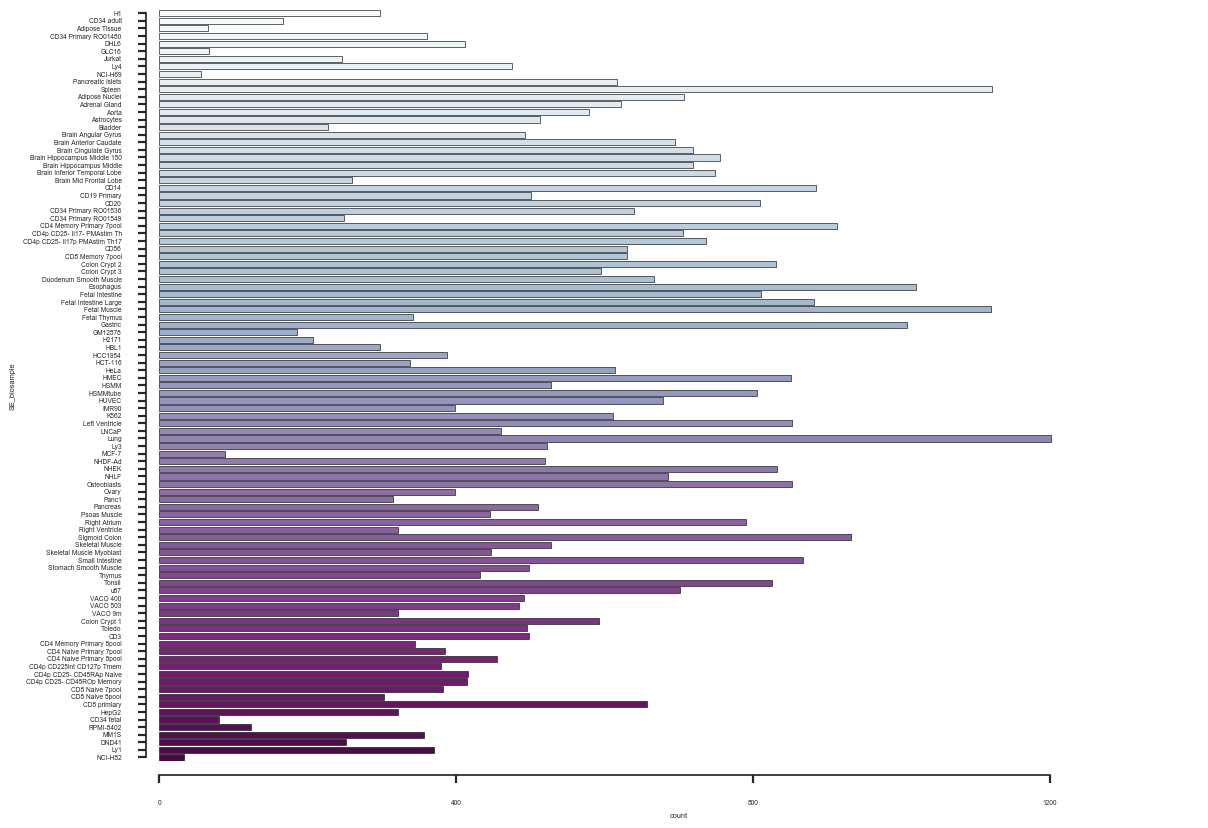

In [27]:
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.3, rc={"lines.linewidth": 0.3})   
# Draw a count plot to show the number of planets discovered each year
g = sns.factorplot(y="SE_biosample", data=df_dbsuper_only, kind="count",
                   palette="BuPu", size=8, aspect=1.5)
g.set_xticklabels(step=2)
sns.despine(offset=10,trim=True)

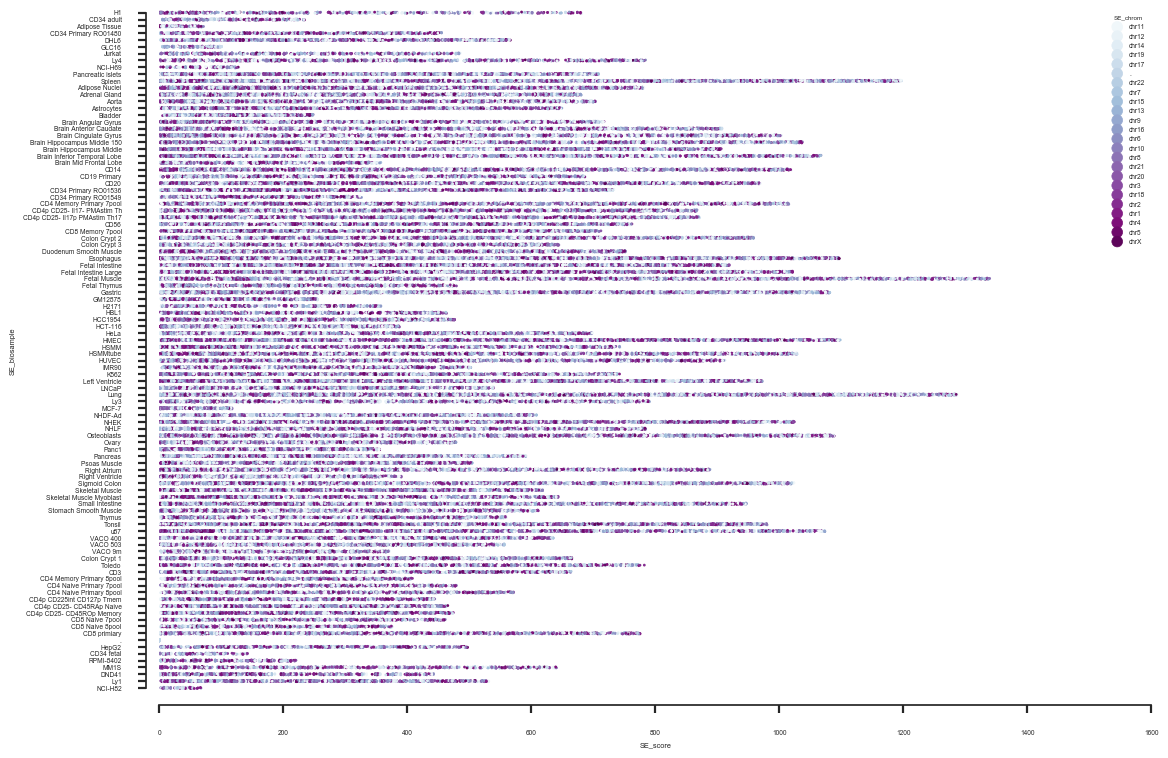

In [53]:
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.3, rc={"lines.linewidth": 0.3})   
g = sns.stripplot(y="SE_biosample", x="SE_score", data=placenta_df, hue="SE_chrom", jitter=True, size=2, palette="BuPu");
g.set_xlim(0,)
#g.set_xscale("log")
sns.despine(offset=10,trim=True)

In [29]:
pivot = pd.pivot_table(placenta_df,index=["SE_biosample"], values=["name"], columns=["chrom"],aggfunc=[len])
placenta_df_scores = placenta_df.query("SE_name != '.'")
pivot_scores = pd.pivot_table(placenta_df_scores,
                              index=["SE_biosample"], 
                              values=["SE_score"], columns=["chrom"],aggfunc=[np.mean])

pivot_ovlp_sizes = pd.pivot_table(placenta_df_scores,
                              index=["SE_biosample"], 
                              values=["SE_ovlp_pct"], columns=["chrom"],aggfunc=[np.mean])

In [30]:
pivot = pivot.fillna(0)
pivot_scores = pivot_scores.fillna(0)
pivot_ovlp_sizes = pivot_ovlp_sizes.fillna(0)

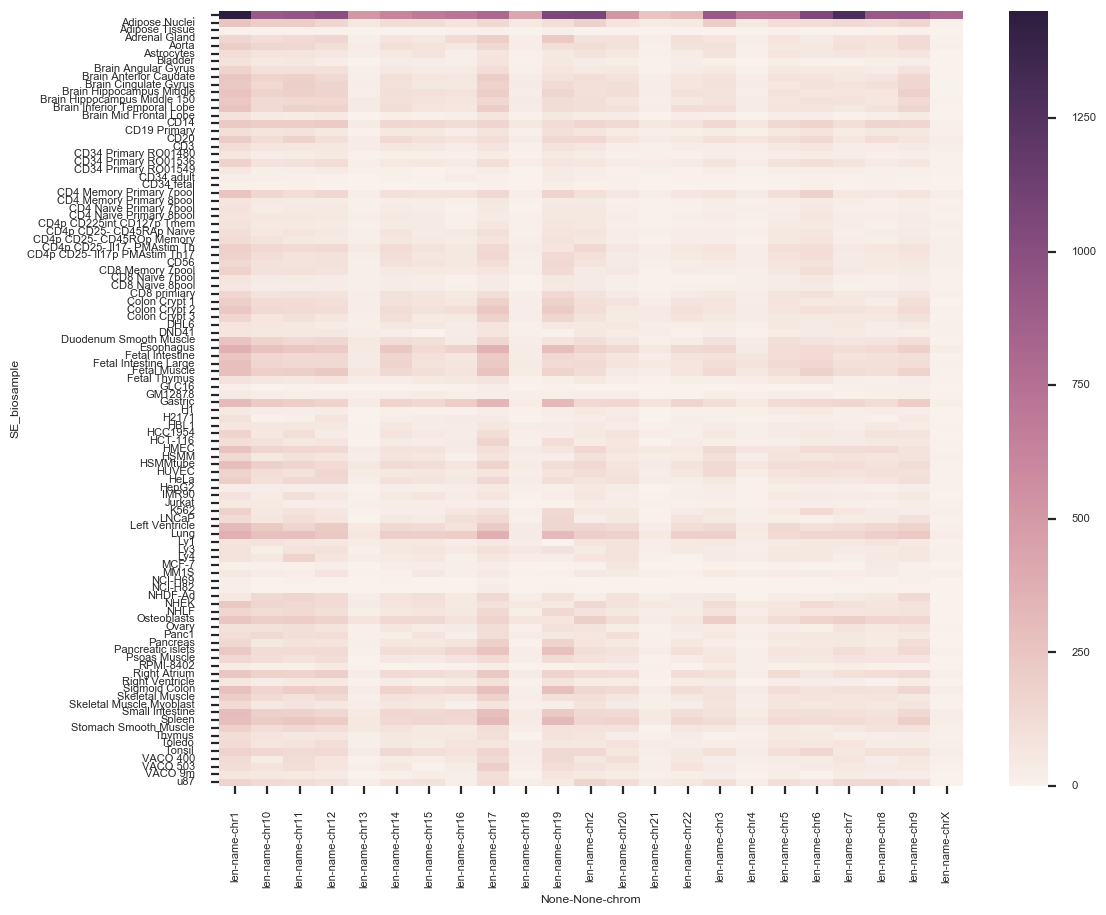

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster", font_scale=0.5, rc={"lines.linewidth": 0.5})

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(12,10))   
sns.heatmap(pivot, annot=False, linewidths=0, ax=ax)

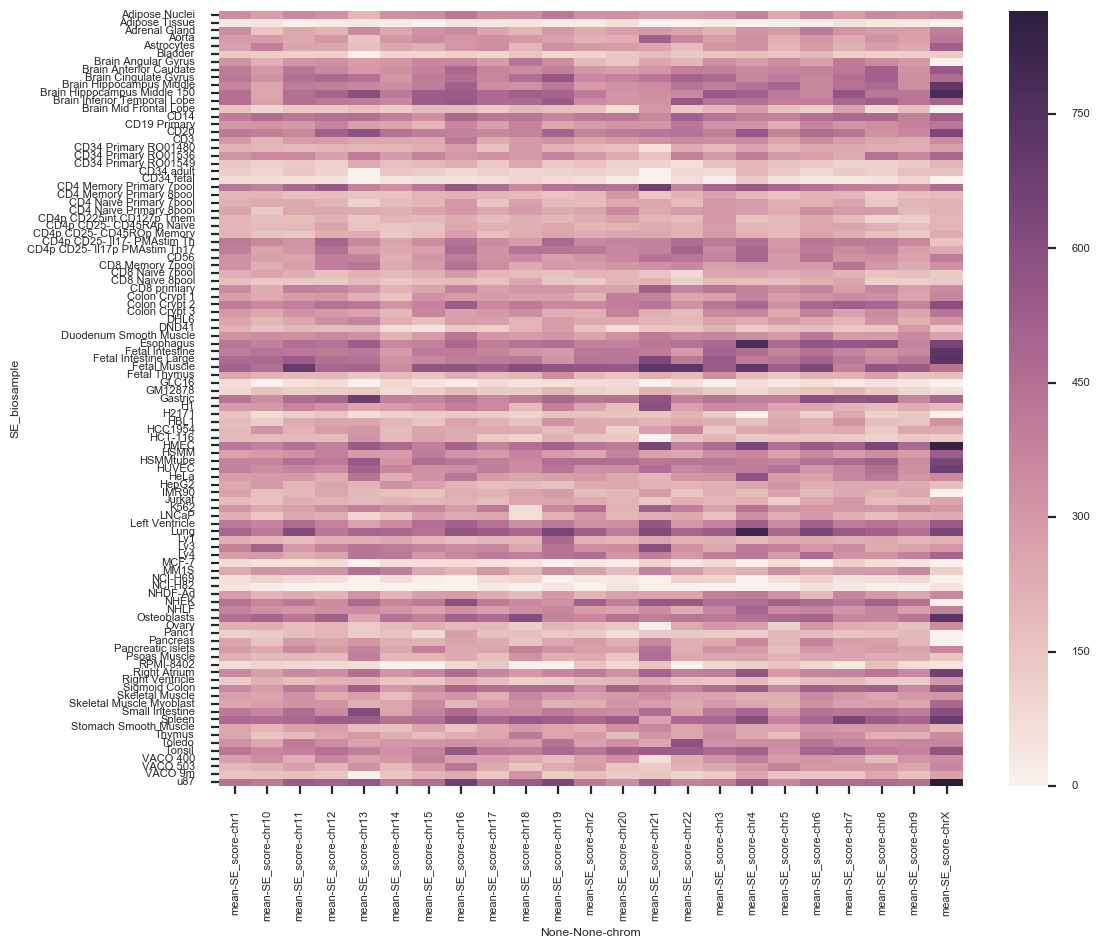

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster", font_scale=0.5, rc={"lines.linewidth": 0.5})

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(12,10))   
sns.heatmap(pivot_scores, annot=False, linewidths=0, ax=ax)

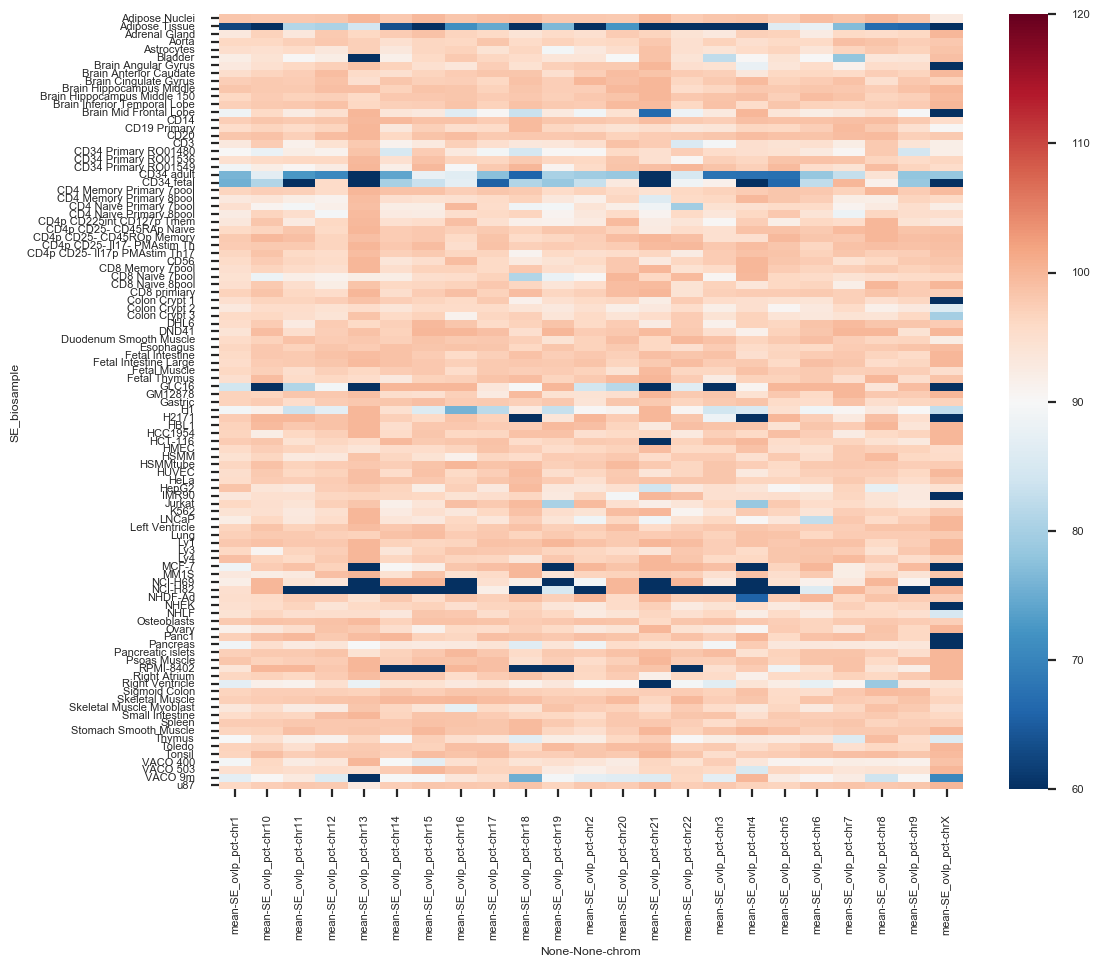

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster", font_scale=0.5, rc={"lines.linewidth": 0.5})

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots(figsize=(12,10))   
sns.heatmap(pivot_ovlp_sizes, annot=False, linewidths=0, ax=ax,center=90, vmin=60, vmax=100)

In [34]:
placenta_min_df = placenta_df.query("SE_name != '.'")[['size', 'SE_size', 'SE_ovlp_pct', 'SE_biosample','chrom']]
placenta_min_df = placenta_min_df.fillna(0)

/Users/manuel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(0, 600000.0)

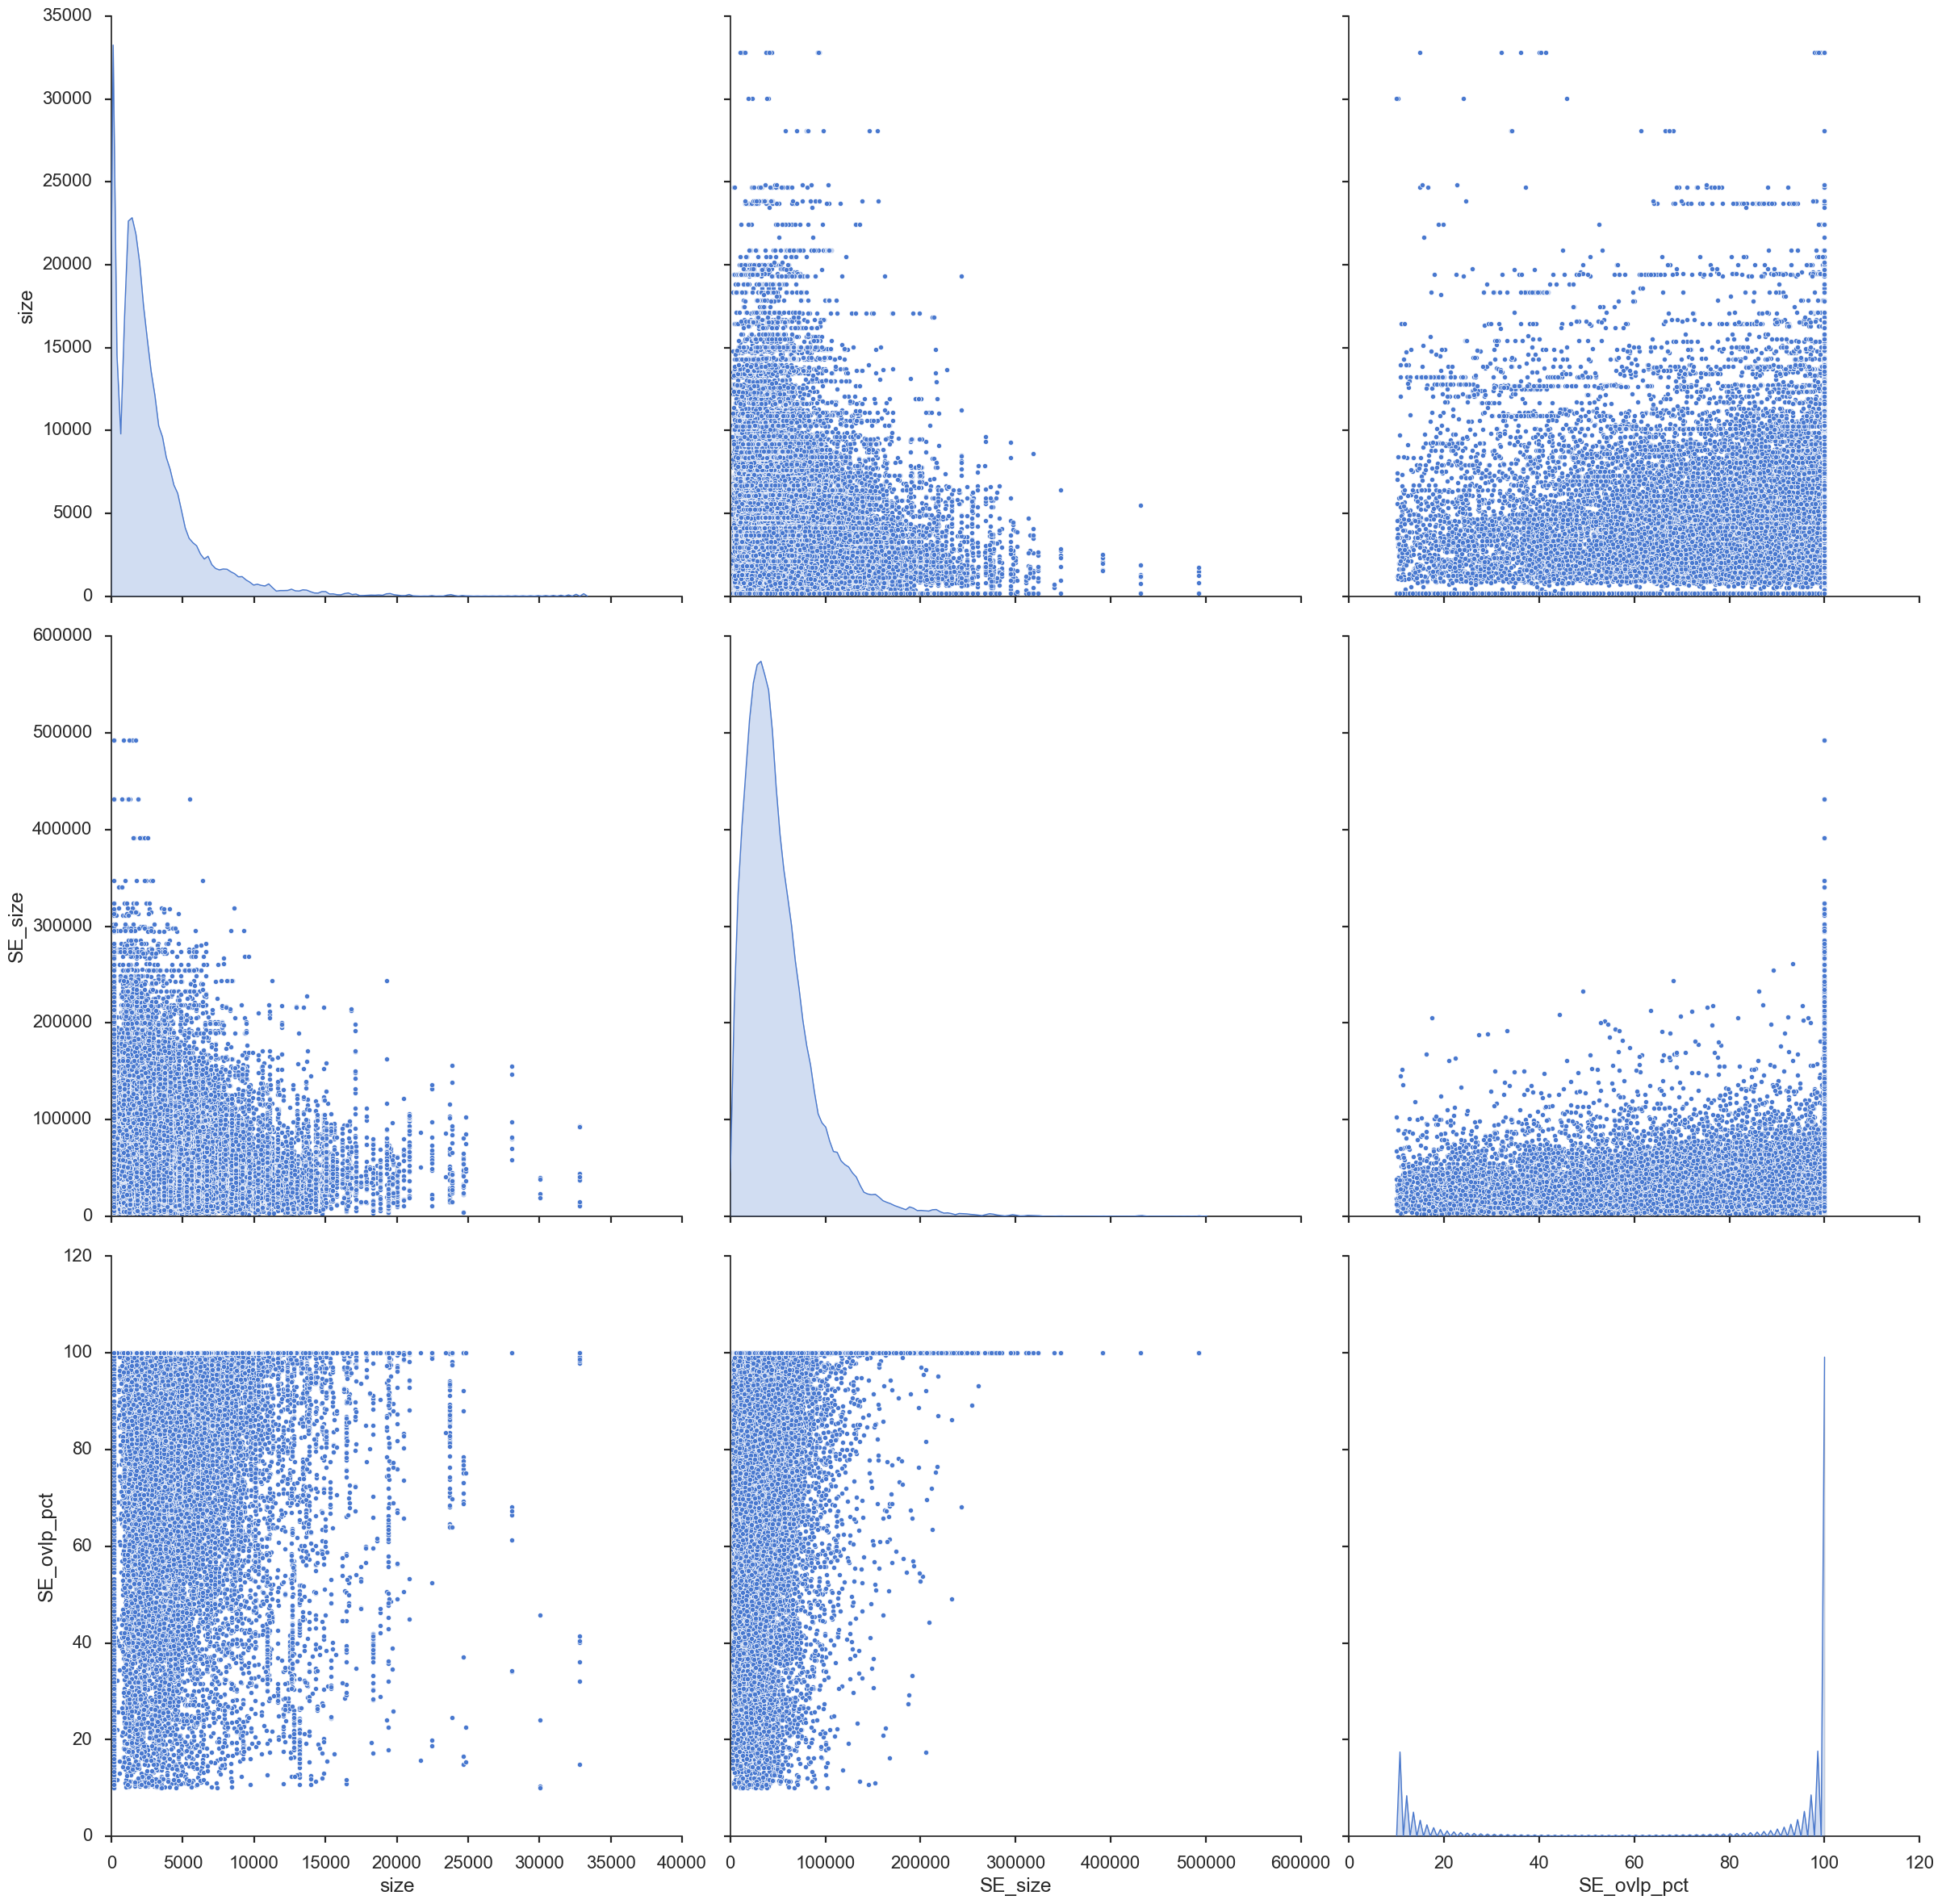

In [35]:
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=1, rc={"lines.linewidth": 1})   
g = sns.pairplot(placenta_min_df,  size=8, diag_kind='kde',
               diag_kws=dict(shade=True))

g.axes[0,0].set_xlim(0,)
g.axes[0,1].set_xlim(0,)
g.axes[0,1].set_ylim(0,)
g.axes[0,2].set_xlim(0,)
g.axes[0,2].set_ylim(0,)

g.axes[1,0].set_xlim(0,)
g.axes[1,0].set_ylim(0,)
#g.axes[1,2].set_xlim(0,)
#g.axes[1,2].set_ylim(0,100)


In [39]:
placenta_df.describe()

index         start           end     score           size  \
count  170405.000000  1.704050e+05  1.704050e+05  170405.0  170405.000000   
mean   243109.000000  7.392388e+07  7.392656e+07       1.0    2681.100285   
std     49191.830648  5.494697e+07  5.494715e+07       0.0    2795.144008   
min    157907.000000  1.030000e+04  1.045000e+04       1.0     150.000000   
25%    200508.000000  3.314144e+07  3.314375e+07       1.0     993.000000   
50%    243109.000000  6.201217e+07  6.201689e+07       1.0    1918.000000   
75%    285710.000000  1.092188e+08  1.092235e+08       1.0    3497.000000   
max    328311.000000  2.491999e+08  2.492017e+08       1.0   32806.000000   

           SE_start        SE_end       SE_score        SE_size  \
count  1.704050e+05  1.704050e+05  170405.000000  151762.000000   
mean   6.575242e+07  6.579717e+07     305.074288   50241.716912   
std    5.679541e+07  5.680376e+07     278.025403   37861.776300   
min   -1.000000e+00 -1.000000e+00      -1.000000     875.000000   
25%    1.992777e+07  1.998458e+07      65.000000   24916.000000   
50%    5.062299e+07  5.065176e+07     237.000000   41399.000000   
75%    1.017078e+08  1.017695e+08     481.000000   64938.000000   
max    2.491573e+08  2.491854e+08    1339.000000  492600.000000   

         SE_ovlp_len    SE_ovlp_pct  
count  170405.000000  170405.000000  
mean     2354.018943      86.049729  
std      2619.176252      32.242450  
min         0.000000       0.000000  
25%       150.000000     100.000000  
50%      1721.000000     100.000000  
75%      3198.000000     100.000000  
max     32806.000000     100.000000

In [41]:
#dbsuper_df[dbsuper_df.Gene.str.contains('GADD45G').fillna(False)]

In [42]:
def fill_null(row, col):
    if row[col] is None:
        return 'Pippo'


In [43]:
database = "/Users/manuel/development/thesis/storage/encode_overlaps.hdf"
gene_df = pd.read_hdf(database,'encode_dbsuper',where='SE_associated_gene == "GADD45G"')

In [51]:
gene_df.T

41791    \
index                                                            41791   
chrom                                                             chr9   
start                                                         92301160   
end                                                           92301310   
name                                         ENCODE.3.ENCFF778PVS.8797   
score                                                                1   
strand                                                               .   
size                                                               150   
method                                                   DNase_H3K27ac   
description          Enhancer-like regions using DNase and H3K27ac ...   
assembly                                                          hg19   
biosample_type                                            primary cell   
biosample_term_id                                           CL:0002327   
biosample_term_name                            mammary epithelial cell   
developmental_slims                                       ['ectoderm']   
system_slims                                   ['integumental system']   
organ_slims                                          ['mammary gland']   
encyclopedia                                                    ENCODE   
SE_chrom                                                          chr9   
SE_start                                                      92276247   
SE_end                                                        92302174   
SE_name                                                       SE_41786   
SE_score                                                           232   
SE_size                                                          25927   
SE_associated_gene                                             GADD45G   
SE_method                                                      H3K27ac   
SE_biosample                                                     LNCaP   
SE_ovlp_len                                                        150   
SE_ovlp_pct                                                        100   
SE_encyclopedia                                                dbSUPER   

                                                               41793    \
index                                                            41793   
chrom                                                             chr9   
start                                                         92301160   
end                                                           92301310   
name                                         ENCODE.3.ENCFF778PVS.8797   
score                                                                1   
strand                                                               .   
size                                                               150   
method                                                   DNase_H3K27ac   
description          Enhancer-like regions using DNase and H3K27ac ...   
assembly                                                          hg19   
biosample_type                                            primary cell   
biosample_term_id                                           CL:0002327   
biosample_term_name                            mammary epithelial cell   
developmental_slims                                       ['ectoderm']   
system_slims                                   ['integumental system']   
organ_slims                                          ['mammary gland']   
encyclopedia                                                    ENCODE   
SE_chrom                                                          chr9   
SE_start                                                      92263344   
SE_end                                                        92302147   
SE_name                                                       SE_01500   
SE_score                                                          

In [44]:
gene_min_df = gene_df.query("SE_name != '.'")[['size', 'SE_size', 'SE_ovlp_pct', 'SE_biosample','chrom','biosample_term_name']]
gene_min_df = gene_min_df.fillna(0)

In [48]:
neuronal_df = gene_min_df.query("biosample_term_name=='neuronal stem cell'")
neuronal_df

size  SE_size  SE_ovlp_pct              SE_biosample chrom  \
2035143   150  17812.0        100.0                   Gastric  chr9   
2035144   150  25927.0        100.0                     LNCaP  chr9   
2035146   150  38803.0        100.0             Adrenal Gland  chr9   
2035147   150  32938.0        100.0                  Pancreas  chr9   
2046053   150  17812.0        100.0                   Gastric  chr9   
2046054   150  25927.0        100.0                     LNCaP  chr9   
2046056   150  38803.0        100.0             Adrenal Gland  chr9   
2046057   150  32938.0        100.0                  Pancreas  chr9   
2048043   150  17812.0        100.0                   Gastric  chr9   
2048044   150  25927.0        100.0                     LNCaP  chr9   
2048046   150  38803.0        100.0             Adrenal Gland  chr9   
2048047   150  32938.0        100.0                  Pancreas  chr9   
2094945   150  59991.0        100.0  CD4 Memory Primary 8pool  chr9   
2180697   150  32816.0        100.0                   Gastric  chr9   
2180698   150  32958.0        100.0     Stomach Smooth Muscle  chr9   
2190371   150  32816.0        100.0                   Gastric  chr9   
2190372   150  32958.0        100.0     Stomach Smooth Muscle  chr9   
2204768   150  32816.0        100.0                   Gastric  chr9   
2204769   150  32958.0        100.0     Stomach Smooth Muscle  chr9   
2206576   150  32816.0        100.0                   Gastric  chr9   
2206577   150  32958.0        100.0     Stomach Smooth Muscle  chr9   
2220631   150  32816.0        100.0                   Gastric  chr9   
2220632   150  32958.0        100.0     Stomach Smooth Muscle  chr9   
2221001   150  32816.0        100.0                   Gastric  chr9   
2221002   150  32958.0        100.0     Stomach Smooth Muscle  chr9   
2221049   150  32816.0        100.0                   Gastric  chr9   
2221050   150  32958.0        100.0     Stomach Smooth Muscle  chr9   
2224018   150  32816.0        100.0                   Gastric  chr9   
2224019   150  32958.0        100.0     Stomach Smooth Muscle  chr9   
2225380   150  59991.0        100.0  CD4 Memory Primary 8pool  chr9   
2225404   150  75500.0        100.0                    Thymus  chr9   

        biosample_term_name  
2035143  neuronal stem cell  
2035144  neuronal stem cell  
2035146  neuronal stem cell  
2035147  neuronal stem cell  
2046053  neuronal stem cell  
2046054  neuronal stem cell  
2046056  neuronal stem cell  
2046057  neuronal stem cell  
2048043  neuronal stem cell  
2048044  neuronal stem cell  
2048046  neuronal stem cell  
2048047  neuronal stem cell  
2094945  neuronal stem cell  
2180697  neuronal stem cell  
2180698  neuronal stem cell  
2190371  neuronal stem cell  
2190372  neuronal stem cell  
2204768  neuronal stem cell  
2204769  neuronal stem cell  
2206576  neuronal stem cell  
2206577  neuronal stem cell  
2220631  neuronal stem cell  
2220632  neuronal stem cell  
2221001  neuronal stem cell  
2221002  neuronal stem cell  
2221049  neuronal stem cell  
2221050  neuronal stem cell  
2224018  neuronal stem cell  
2224019  neuronal stem cell  
2225380  neuronal stem cell  
2225404  neuronal stem cell

/Users/manuel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/manuel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/manuel/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/Users/manuel/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/Users/manuel/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcou

(0, 80000.0)

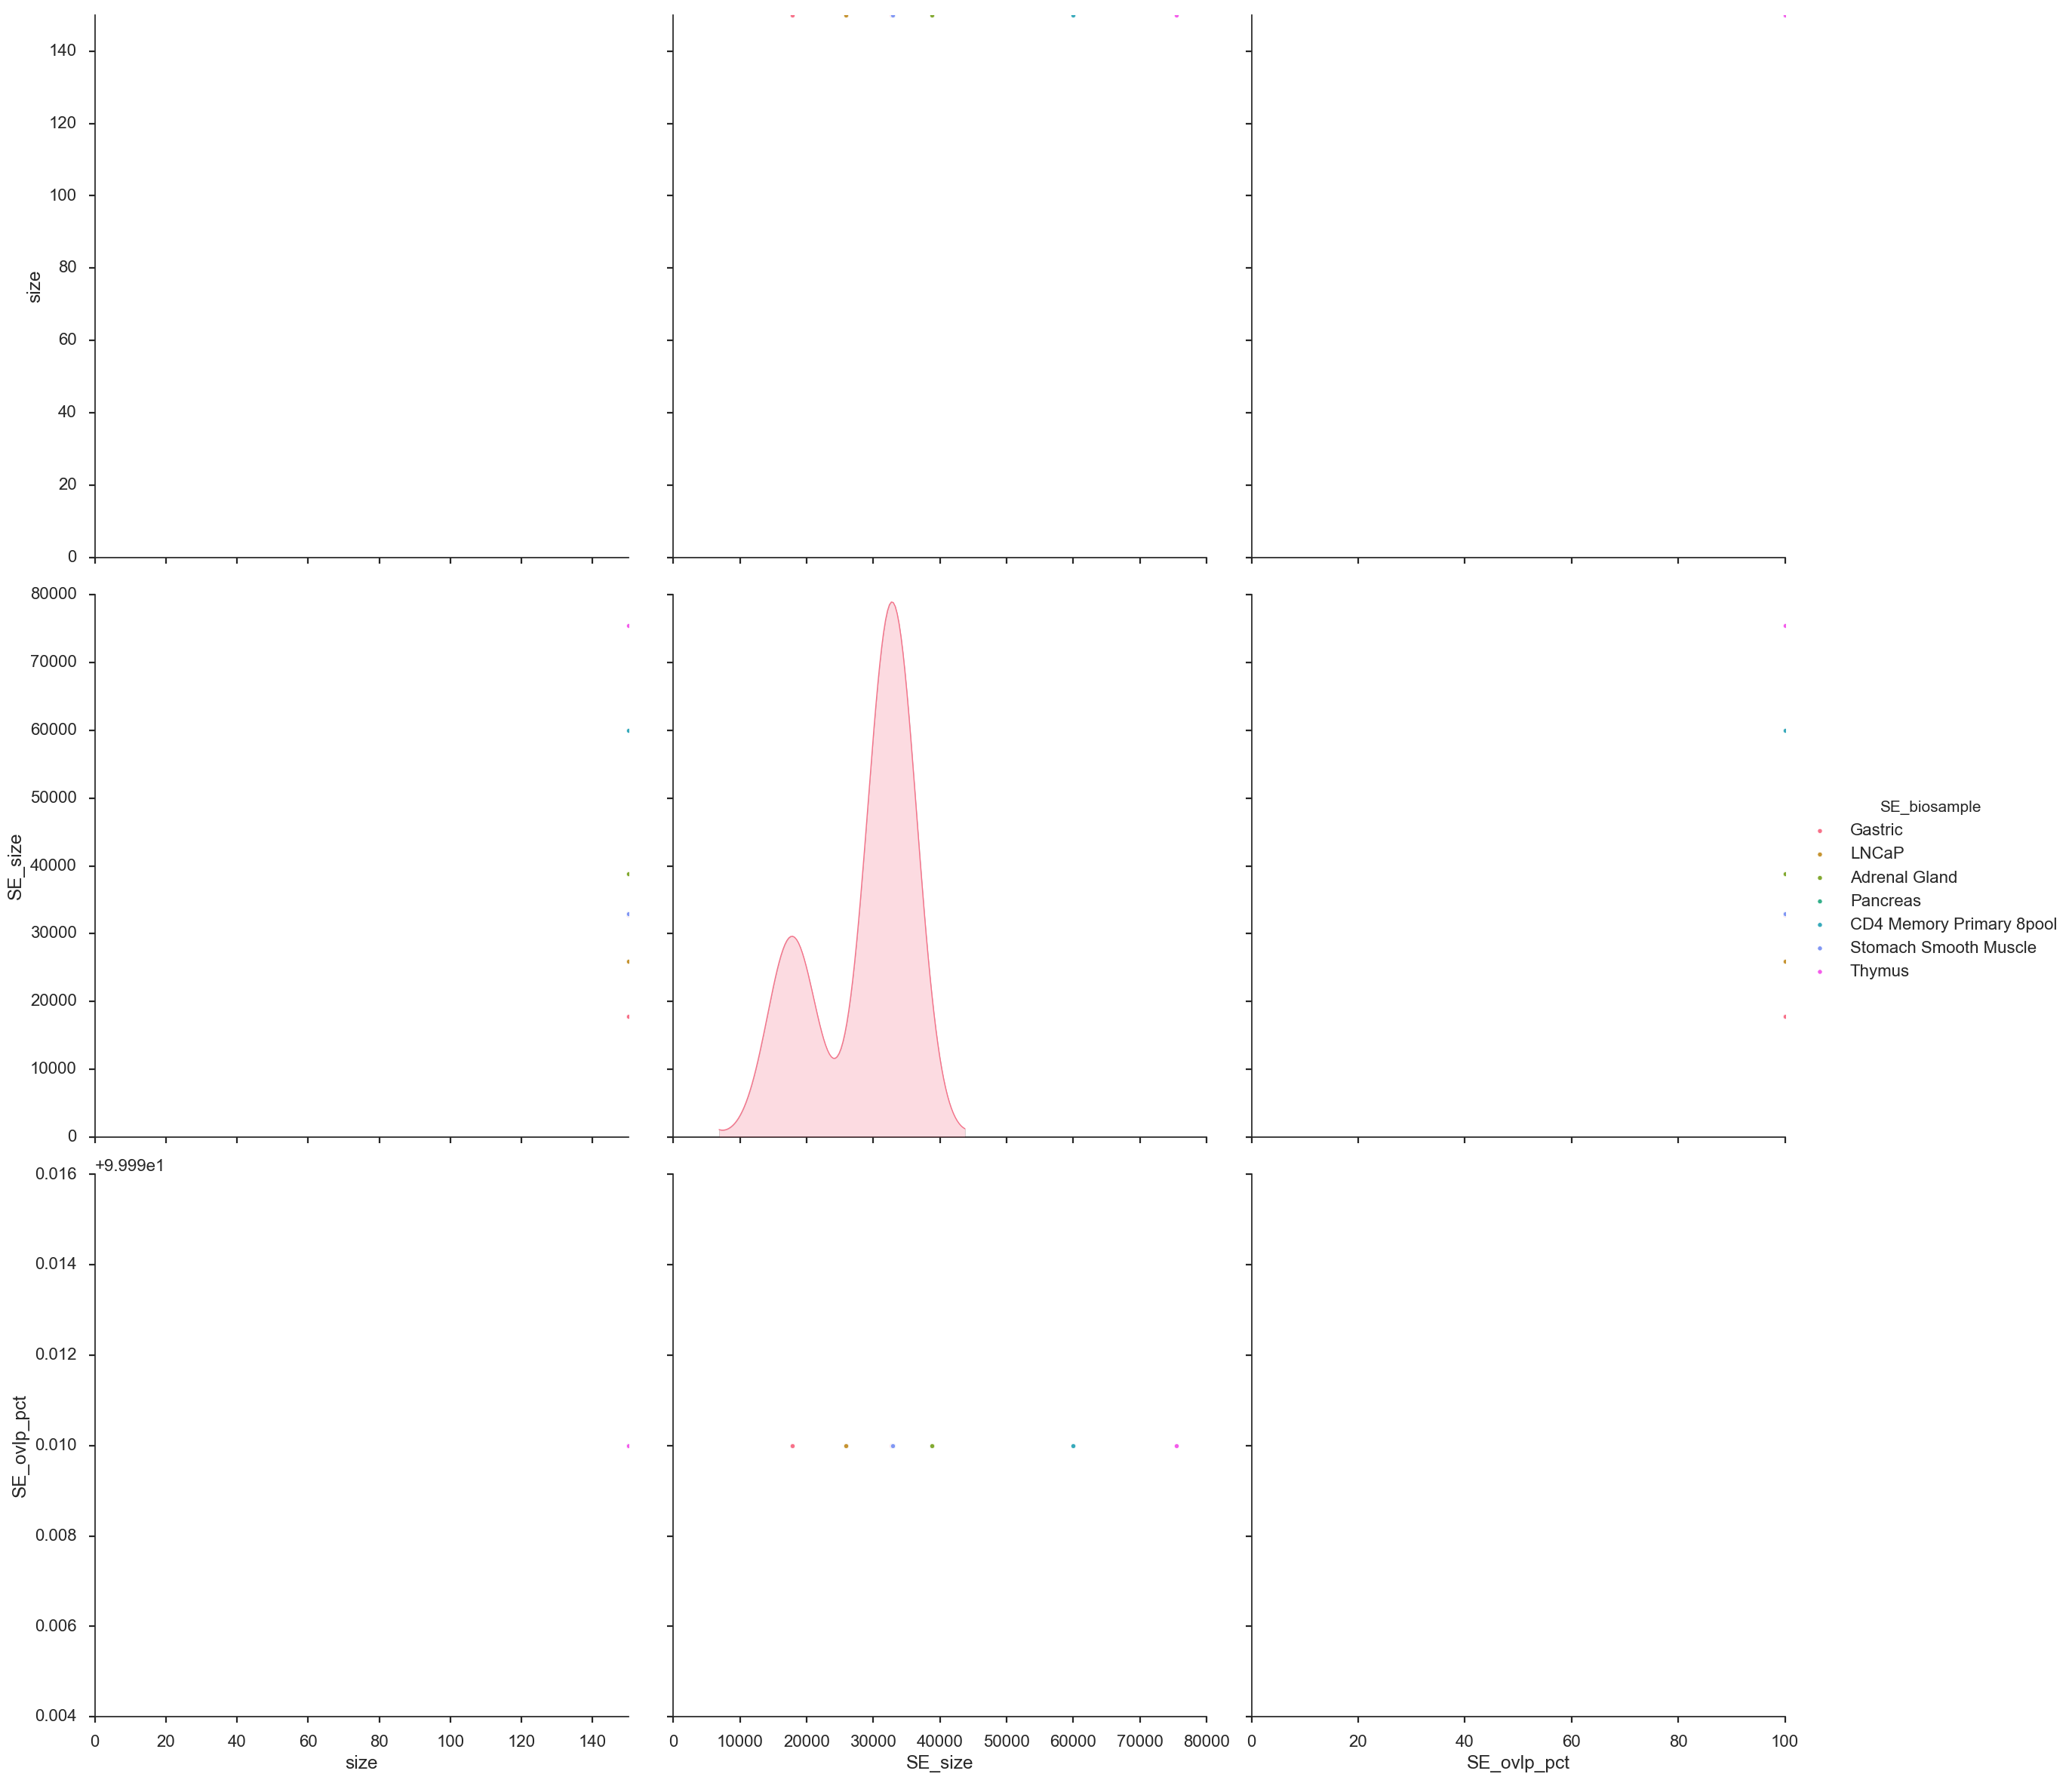

In [49]:
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=1, rc={"lines.linewidth": 1})   
g = sns.pairplot(neuronal_df,  size=8, diag_kind='kde',
               diag_kws=dict(shade=True), hue='SE_biosample')

g.axes[0,0].set_xlim(0,)
g.axes[0,1].set_xlim(0,)
g.axes[0,1].set_ylim(0,)
g.axes[0,2].set_xlim(0,)
g.axes[0,2].set_ylim(0,)

g.axes[1,0].set_xlim(0,)
g.axes[1,0].set_ylim(0,)
#g.axes[1,2].set_xlim(0,)
#g.axes[1,2].set_ylim(0,100)
